In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import seaborn as sns; sns.set()

In [2]:
df_new = pd.read_csv("TCGA+GEO.ML_DEGs.tsv.gz", compression='gzip', sep='\t', error_bad_lines=False,index_col="Unnamed: 0")
PCs=pd.read_csv("PCA_for_Danat.tsv", error_bad_lines=False, index_col="Unnamed: 0")
#healhty = pd.read_csv("TCGA+GEO.healthy.tsv.gz", error_bad_lines=False, index_col="Unnamed: 0")

In [131]:
#healhty
#df_new

,Unnamed: 0,ADAMTS5,ADAP1,ADCY2,ADI1,ADORA1,AGFG2,AKR1C1,APOD,AQP4,...,ZBTB7A,ZMYND8,ZNF521,ZNF536,ZNF576,ZNF771,Primary_site,Metastasis_site,Sample_label,batch
0,GSM1481921,0.236783,-2.220169,-1.326656,-0.965630,-0.016435,-2.006678,-1.397874,1.099111,0.945924,...,0.500735,0.845324,0.064032,0.088808,-2.337875,-0.025659,thyroid,lymph node,Primary Normal,GSE60542
1,GSM1481920,0.606270,-0.813283,-0.262105,-0.423363,0.809188,0.452377,0.433395,1.212982,0.229451,...,-1.237809,-0.129286,0.956741,0.457482,0.397536,0.127087,thyroid,NaN,Primary Normal,GSE60542
2,GSM1481919,0.357505,-0.856580,-0.529223,-2.092744,0.406388,-0.278732,-0.965041,0.619198,0.210138,...,-0.500625,-0.163927,-0.091714,-0.412724,0.265198,0.132114,thyroid,NaN,Primary Normal,GSE60542
3,GSM1481918,0.953894,-0.625318,0.858827,-1.732327,-2.347456,0.073499,-0.354010,2.296764,1.698206,...,-1.339252,-1.266782,0.945844,1.626265,0.545895,0.013481,thyroid,lymph node,Primary Normal,GSE60542
4,GSM1481916,1.110980,-1.075290,1.485491,-0.055238,-0.763484,-0.049347,-0.455321,0.139170,0.220120,...,-1.580555,-0.423472,-0.132165,-0.987211,-0.478199,4.556969,thyroid,NaN,Primary Normal,GSE60542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,TCGA-V5-A7RE-11A,-1.501861,1.192071,-0.436240,-0.812654,-1.571286,0.204660,0.138444,-1.501861,-1.292465,...,1.346386,5.199338,-1.391202,0.111890,-1.130517,0.480839,esophagus,NaN,Primary Normal,TCGA-ESCA
385,TCGA-V5-AASX-11A,-0.809168,1.225943,-1.352623,-0.540882,-0.391137,-1.352623,-0.296607,-1.497997,-1.159515,...,0.903301,0.662724,-0.798769,-0.162552,-0.256197,0.595437,esophagus,NaN,Primary Normal,TCGA-ESCA
386,TCGA-X7-A8D6-11A,0.509202,-0.134645,0.013801,0.013801,0.031369,-1.397837,1.040090,0.511827,-0.931971,...,0.503497,-0.329548,0.592444,-0.381675,-1.744448,-0.321611,thymus,NaN,Primary Normal,TCGA-THYM
387,TCGA-X7-A8D7-11A,-1.312981,0.026349,-0.668981,-1.375461,-0.378977,-1.275302,-0.342823,-0.494971,-0.897655,...,-0.364191,0.161079,-0.205941,-0.773140,-0.033880,-0.168912,thymus,NaN,Primary Normal,TCGA-THYM


In [3]:
#df_new["whos"] = df_new.apply(lambda row: "TCGA" if row["batch"].startswith('TCGA') == True else "GEO", axis=1)
#df_new["feature"] = df_new.apply(lambda row: '_'.join(row[['Primary_site', 'Sample_label']]), axis=1)
#classes= df_new.groupby('feature').agg('median')

meta = df_new[df_new.Sample_label == "Metastasis Tumor"].Primary_site.unique()
classes= df_new[df_new.Primary_site.isin(meta)].groupby('feature').agg('median')
#classes = classes[classes.Primary_site == meta]
classes
#DEG

,AAMDC,ABCC4,ABHD2,ABLIM3,ACOT11,ACSL5,ADAM12,ADAP1,ADGRG1,ADIPOR2,...,ZNF229,ZNF350,ZNF394,ZNF43,ZNF460,ZNF512,ZNF626,ZNF667,ZNF677,ZNF84
feature,,,,,,,,,,,,,,,,,,,,,
bone_Metastasis Tumor,-0.505133,1.199623,0.544779,0.499296,-0.178786,-0.385234,0.421061,0.268479,-1.046473,-0.438999,...,1.030055,0.308883,-0.638967,1.010533,-0.661040,0.948711,1.861305,2.767293,2.681990,-0.284255
bone_Primary Tumor,-0.578877,1.154615,0.392694,0.426143,0.016338,-0.562103,1.371555,0.005409,-0.581315,-0.708188,...,1.052966,0.473549,-0.532068,0.404301,0.893628,1.033683,2.060973,2.723004,2.637975,-0.464899
breast_Metastasis Tumor,-0.729533,-0.695939,-0.029626,0.313025,-0.506326,-1.809796,0.343775,-0.730020,0.520785,-0.751744,...,0.531048,0.059604,-0.068176,0.895766,1.231531,0.552003,0.761322,0.771491,1.095551,0.447527
breast_Primary Tumor,0.163806,-0.816717,0.046003,0.494247,-1.041063,-0.901892,0.944669,-0.839956,-0.475080,0.447804,...,0.137150,0.399487,-0.440593,0.616231,0.011593,0.102505,0.435778,0.022150,-0.057048,0.234876
cervix_Metastasis Tumor,-0.635779,-0.736951,-0.098222,-0.972306,0.177533,-0.304384,-0.324238,-0.664601,-0.118370,-0.785678,...,-0.475012,0.149948,-0.033596,-0.180464,0.203335,-0.769536,-0.898558,-0.074283,-0.194436,0.752898
cervix_Primary Tumor,-0.281086,-0.243339,-0.327598,-0.151879,0.250102,-0.015824,-0.108876,-0.023027,0.228543,0.256802,...,-1.014078,-1.156168,-0.147214,-1.320309,0.198763,-0.407444,-1.102197,-0.863337,-1.151221,-0.482142
colorectum_Metastasis Tumor,0.201238,-0.540236,0.695929,0.484809,0.586821,1.220751,-0.008027,0.114331,-0.280875,0.188703,...,0.021634,0.494944,-0.565903,-1.043394,-0.103212,-0.570959,-1.513589,0.105432,-0.381675,0.781287
colorectum_Primary Tumor,-0.177143,0.355957,0.076612,-0.625136,0.933095,1.361427,-0.365160,1.170830,-0.150227,0.273944,...,0.039365,-0.242711,-0.102128,-0.437851,-0.041567,-0.476800,-0.857082,-0.309573,-0.419317,-0.053724
kindey_Metastasis Tumor,0.242072,0.594327,-0.416900,1.845419,0.185774,-0.746484,0.655224,-0.549718,0.225579,-0.749071,...,0.026136,0.112309,-0.315270,0.724263,1.155820,0.590681,0.561569,0.499520,1.239514,-0.130893


In [10]:

reduced_data = pd.DataFrame(PCA(n_components=10).fit_transform(df_new.select_dtypes(include=['float64'])))
#reduced_data.iloc[:,0]
#reduced_data_tsne = pd.DataFrame(TSNE(random_state=0, n_components=3).
#                                 fit_transform(df_new.select_dtypes(include=['float64'])))
#reducer = umap.UMAP()
#reduced_data_umap = reducer.fit_transform(df_new.select_dtypes(include=['float64']))


In [3]:
#reduced_data_tsne.to_csv("tSNE_std_merged.tsv", sep='\t')
PCs[PCs.Sample_label == "Primary Tumor"].iloc[:,[0,1,2,3,4,51]]

,PC1,PC2,PC3,PC4,PC5,Primary_site
0,-12.252540,-8.589349,2.472244,-6.847830,-13.254329,breast
1,-12.758630,-12.913924,5.644175,-4.439368,-8.478543,breast
2,-18.280690,-8.181273,4.082847,-5.530916,-12.064272,breast
3,-12.359772,-9.583776,3.129057,0.072023,-10.245846,breast
4,-7.957428,-12.445885,-1.335836,-2.973230,-13.388690,breast
...,...,...,...,...,...,...
6432,0.573013,-14.685630,-9.384745,-0.940315,2.250053,testis
6433,14.252433,6.755392,3.675818,-10.732485,-4.457194,stomach
6434,11.507755,3.254123,6.023173,-9.521255,-3.548994,esophagus
6435,-3.859753,-11.800566,-15.709268,2.711741,0.717180,thymus


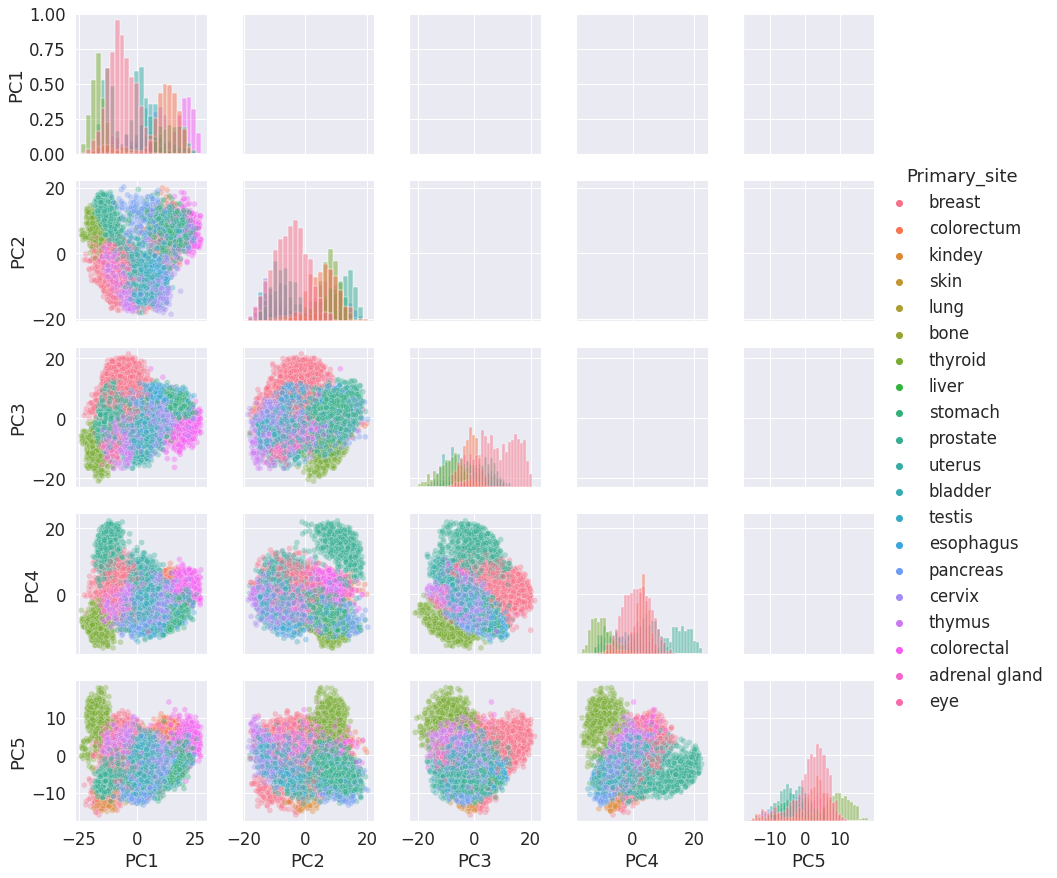

In [12]:
#import seaborn as sns
#sns.scatterplot(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1], hue= df_new.Sample_label)
#df = reduced_data
#df = pd.merge(df, df_new.Sample_label, left_index=True, right_index=True)
#axes = scatter_matrix(df, alpha=0.5, figsize=(15, 10), diagonal='kde')
#corr = df.corr().as_matrix()
#for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
#    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
#plt.show()
#df
sns.set(font_scale=1.5)
g = sns.PairGrid(PCs[PCs.Sample_label == "Primary Tumor"].iloc[:,[0,1,2,3,4,51]], hue="Primary_site")
g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_lower(sns.scatterplot,alpha=0.35)
g.add_legend()
#g.legend()

In [14]:
g.savefig('./labeled_pca.png', bbox_inches='tight')

In [4]:
#df_new[['ZXDC','ZYX','ZZEF1','ZZZ3','batch']].groupby('batch').agg(['count','mean'])
df_new["whos"] = df_new.apply(lambda row: "TCGA" if row["batch"].startswith('TCGA') == True else "GEO", axis=1)
#df_new[df_new.whos == "GEO"].select_dtypes(include=['float64']) = df_new[df_new.whos == "GEO"].select_dtypes(include=['float64']).divide(100)
#df_new.update(df_new[df_new.whos == "GEO"].select_dtypes(include=['float64']).divide(100))
#df_new.replace(df_new[df_new.whos == "GEO"].select_dtypes(include=['float64']), )
df_new

from sklearn.decomposition import PCA
reduced_data = pd.DataFrame(PCA(n_components=10).fit_transform(df_new.select_dtypes(include=['float64'])))
#reduced_data
#reduced_data.iloc[:,0]
import seaborn as sns
sns.scatterplot(x=reduced_data.iloc[:,0], y=reduced_data.iloc[:,1], hue= df_new.whos)


<AxesSubplot:xlabel='0', ylabel='1'>

In [39]:
#import seaborn as sns; sns.set()
#flights = sns.load_dataset("flights")
#flights
#flights = flights.pivot("month", "year", "passengers")
#g = sns.clustermap(flights)
classes

,AAMDC,ABCC4,ABHD2,ABLIM3,ACOT11,ACSL5,ADAM12,ADAP1,ADGRG1,ADIPOR2,...,ZNF229,ZNF350,ZNF394,ZNF43,ZNF460,ZNF512,ZNF626,ZNF667,ZNF677,ZNF84
feature,,,,,,,,,,,,,,,,,,,,,
GEO_bone_Metastasis Tumor,-0.505133,1.199623,0.544779,0.499296,-0.178786,-0.385234,0.421061,0.268479,-1.046473,-0.438999,...,1.030055,0.308883,-0.638967,1.010533,-0.661040,0.948711,1.861305,2.767293,2.681990,-0.284255
GEO_bone_Primary Tumor,-0.578877,1.154615,0.392694,0.426143,0.016338,-0.562103,1.371555,0.005409,-0.581315,-0.708188,...,1.052966,0.473549,-0.532068,0.404301,0.893628,1.033683,2.060973,2.723004,2.637975,-0.464899
GEO_breast_Metastasis Tumor,-0.767080,-0.713535,-0.075382,0.294026,-0.524976,-1.920999,0.392412,-0.811433,0.629142,-0.819630,...,0.539680,0.071876,-0.064466,0.888403,1.460755,0.568336,0.785309,0.936730,1.333457,0.432291
GEO_breast_Primary Tumor,0.217370,-0.789552,-0.285884,-0.138337,-1.010419,-1.497672,0.508743,-1.013787,-0.316608,-0.098950,...,0.306881,0.348761,0.114876,0.085700,-0.145836,-0.152559,0.567028,0.718574,0.274051,0.046838
GEO_colorectum_Metastasis Tumor,0.201238,-0.540236,0.695929,0.484809,0.586821,1.220751,-0.008027,0.114331,-0.280875,0.188703,...,0.021634,0.494944,-0.565903,-1.043394,-0.103212,-0.570959,-1.513589,0.105432,-0.381675,0.781287
GEO_colorectum_Primary Tumor,-0.177143,0.355957,0.076612,-0.625136,0.933095,1.361427,-0.365160,1.170830,-0.150227,0.273944,...,0.039365,-0.242711,-0.102128,-0.437851,-0.041567,-0.476800,-0.857082,-0.309573,-0.419317,-0.053724
GEO_kindey_Metastasis Tumor,0.242072,0.594327,-0.416900,1.845419,0.185774,-0.746484,0.655224,-0.549718,0.225579,-0.749071,...,0.026136,0.112309,-0.315270,0.724263,1.155820,0.590681,0.561569,0.499520,1.239514,-0.130893
GEO_kindey_Primary Tumor,0.189853,0.799040,-0.296936,1.613252,0.033996,-0.979462,0.035163,-0.401464,0.225977,-0.566970,...,0.131332,0.210617,0.038937,0.328197,0.800821,0.550487,0.439680,0.368350,0.916056,-0.119009
GEO_liver_Metastasis Tumor,0.985615,0.312023,0.661162,1.159798,-1.344420,0.573110,0.535997,-1.629687,-0.670557,0.464422,...,0.233978,0.699126,-1.152112,0.385370,-0.600769,0.170028,1.417654,0.076699,-0.480839,-0.226374


/home/donat/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/donat/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


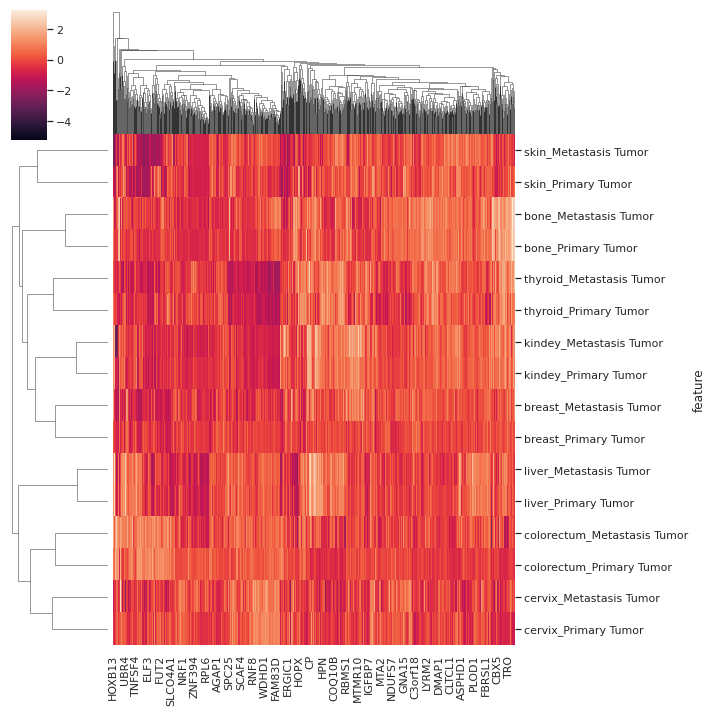

In [4]:

#df_new.columns.rename("genes", inplace=True)
#df_new.columns
#df_new
#sec = df_new.drop(["whos","batch","Primary_site","Metastasis_site","Sample_label"], axis=1)
#
#sec.set_index('Unnamed: 0', inplace=True)
#sec.index.rename("samples", inplace=True)
#sec
#third = sec.pivot("samples", "genes", "expression")
#flights.index
g = sns.clustermap(classes)

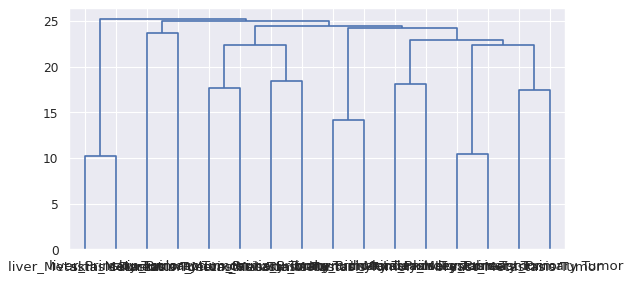

In [117]:
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 80

#sec = df_new
#
#sec.set_index('Unnamed: 0', inplace=True)
#sec.index.rename("samples", inplace=True)
#sec

single = hierarchy.linkage(classes.select_dtypes(include=['float64']), 'single')
single_dm = hierarchy.dendrogram(single, labels=classes.index.tolist(), color_threshold=0)

plt.show()
#sec

In [160]:
#weird merge
healhty
tumr = df_new
healhty
#tumr
tumr2 = tumr[tumr.columns[tumr.columns.isin(healhty.columns)]]
healhty2 = healhty[tumr.columns[tumr.columns.isin(healhty.columns)]]
healhty2

,AAMDC,ABCC4,ABHD2,ABLIM3,ACOT11,ACSL5,ADAM12,ADAP1,ADGRG1,ADIPOR2,...,ZNF460,ZNF512,ZNF626,ZNF667,ZNF677,ZNF84,Primary_site,Metastasis_site,Sample_label,batch
GSM1481921,-0.982670,0.453944,0.289448,-1.675832,-1.263686,0.137672,-0.815834,-2.220169,0.679609,-1.221217,...,-0.226389,-0.062837,0.267539,0.396910,0.486698,0.840316,thyroid,lymph node,Primary Normal,GSE60542
GSM1481920,-0.315026,-1.321894,0.330856,-0.476113,-1.788133,0.085782,1.666334,-0.813283,0.588399,-1.397762,...,0.928545,0.184254,-0.296355,0.205140,0.622439,0.199608,thyroid,NaN,Primary Normal,GSE60542
GSM1481919,-0.672086,-0.559953,0.573753,-0.653400,-0.957596,0.364260,1.532255,-0.856580,0.213671,-1.465146,...,0.497580,-0.254076,-0.195555,0.180405,-0.014742,1.610039,thyroid,NaN,Primary Normal,GSE60542
GSM1481918,0.799560,0.934124,-0.844194,1.105655,-0.169736,-0.870701,0.653507,-0.625318,0.807992,-0.709334,...,0.836293,1.389311,0.448757,0.105775,0.126691,-0.144863,thyroid,lymph node,Primary Normal,GSE60542
GSM1481916,1.087354,-1.022512,-0.401656,0.713501,0.610870,-1.813260,0.302251,-1.075290,1.512372,0.114679,...,0.008345,0.988588,0.564481,0.282506,1.711438,0.831288,thyroid,NaN,Primary Normal,GSE60542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-V5-A7RE-11A,-0.514923,0.220058,1.942703,-0.967422,1.554270,1.070745,0.151121,1.192071,0.373591,-0.388430,...,1.315958,-0.741388,-5.199338,-1.501861,-5.199338,-0.316330,esophagus,NaN,Primary Normal,TCGA-ESCA
TCGA-V5-AASX-11A,-0.687939,-0.548158,5.199338,-1.159515,0.843424,1.025123,-0.087933,1.225943,1.147276,-0.167640,...,1.428482,-0.548158,-1.497997,-5.199338,-1.497997,-0.601439,esophagus,NaN,Primary Normal,TCGA-ESCA
TCGA-X7-A8D6-11A,0.116941,-0.802226,-1.475269,0.610484,-0.346817,0.132113,0.924252,-0.134645,-0.985610,0.384375,...,-2.033104,0.101796,-0.957454,-0.639462,-0.532672,-0.321611,thymus,NaN,Primary Normal,TCGA-THYM
TCGA-X7-A8D7-11A,-0.399276,-0.239380,-0.773140,-0.897655,-1.275302,-0.125788,0.030114,0.026349,-0.733156,-0.636387,...,-0.485069,0.786745,-0.427976,-0.407442,-0.434861,0.130848,thymus,NaN,Primary Normal,TCGA-THYM


/home/donat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/donat/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/donat/anaconda3/lib/python3.6/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


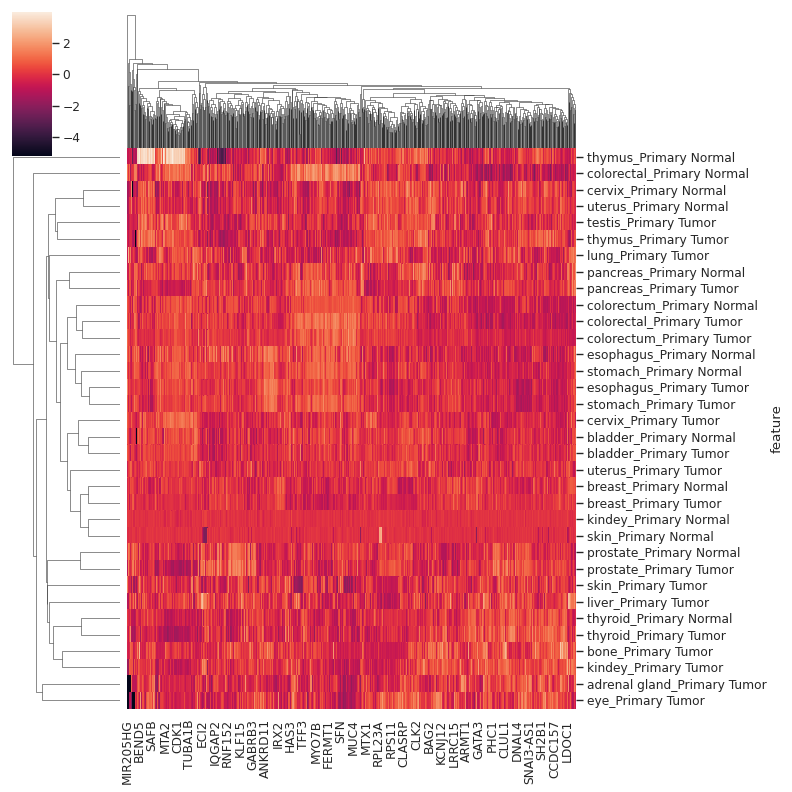

In [171]:
#frames = [healhty2, tumr2]
#both = pd.concat(frames)
#both.Sample_label.value_counts()
both.Sample_label[both.Sample_label.isin(["Primary Tumor", "Primary Normal"])].value_counts()
only_prim = both[both.Sample_label.isin(["Primary Tumor", "Primary Normal"])]
only_prim["feature"] = only_prim.apply(lambda row: '_'.join(row[['Primary_site', 'Sample_label']]), axis=1)
classes_H= only_prim.groupby('feature').agg('median')
g = sns.clustermap(classes_H)
#only_prim